# Uni Variate Analysis
### Analyze each variable and suggest transformations required to enrich the dataset.

In [1]:

import pandas as pd
import numpy as np
import sys
from pathlib import Path

# Add project root to path
sys.path.append(str(Path.cwd().parent))

# Import from utils package
from utils.eda_helpers import (
    analyze_frequency_distribution,
    calculate_default_rates,
    perform_chi_square_test,
    calculate_cramers_v,
    interpret_results,
    check_missing_values
)

from loguru import logger

logger.success("✅ All imports successful!")


2026-01-06 21:37:27.701 | SUCCESS  | __main__:<module>:21 - ✅ All imports successful!


✅ Plotting configuration loaded
   Default figure size: (12, 6)
   Available sizes: ['small', 'medium', 'large', 'wide', 'square', 'report']
   Color palette: 6 colors


In [26]:
file_path = '../data/raw/loan_preprocessed.parquet'

def read_data(file_path = file_path):
    """Reads the dataset from the preprocessed data - Parquet file."""
    logger.info(f"Reading data from {file_path}...")
    try: 
        df = pd.read_parquet(file_path)
        logger.success("Data read successfully.")
        return df
    except Exception as e:
        logger.error(f"Error reading data: {e}")
        raise e 


df = read_data()
df.sample(5)
# rename target column for use of helper functions
df.rename(columns={'loan_status': 'target'}, inplace=True)

df['target'] = df['target'].map({
    'Fully Paid': 0,
    'Charged Off': 1,
    'Default': 1    

})

2026-01-07 18:26:39.140 | INFO     | __main__:read_data:5 - Reading data from ../data/raw/loan_preprocessed.parquet...
2026-01-07 18:26:39.631 | SUCCESS  | __main__:read_data:8 - Data read successfully.


### List all Categorical Columns


In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns


### Categorical Columns Analysis


## Term

2026-01-06 21:38:08.788 | INFO     | utils.eda_helpers:analyze_frequency_distribution:59 - 
2026-01-06 21:38:08.790 | INFO     | utils.eda_helpers:analyze_frequency_distribution:60 - FREQUENCY DISTRIBUTION: term
2026-01-06 21:38:08.790 | INFO     | utils.eda_helpers:analyze_frequency_distribution:61 - ============================================================



Absolute Counts:
term
 36 months    988774
 60 months    314864
Name: count, dtype: int64

Percentage Distribution:
term
 36 months    75.85
 60 months    24.15
Name: proportion, dtype: float64

────────────────────────────────────────────────────────────
Summary:
  Total categories: 2
  Total observations: 1,303,638

✅ No rare categories detected (all >1.0%)


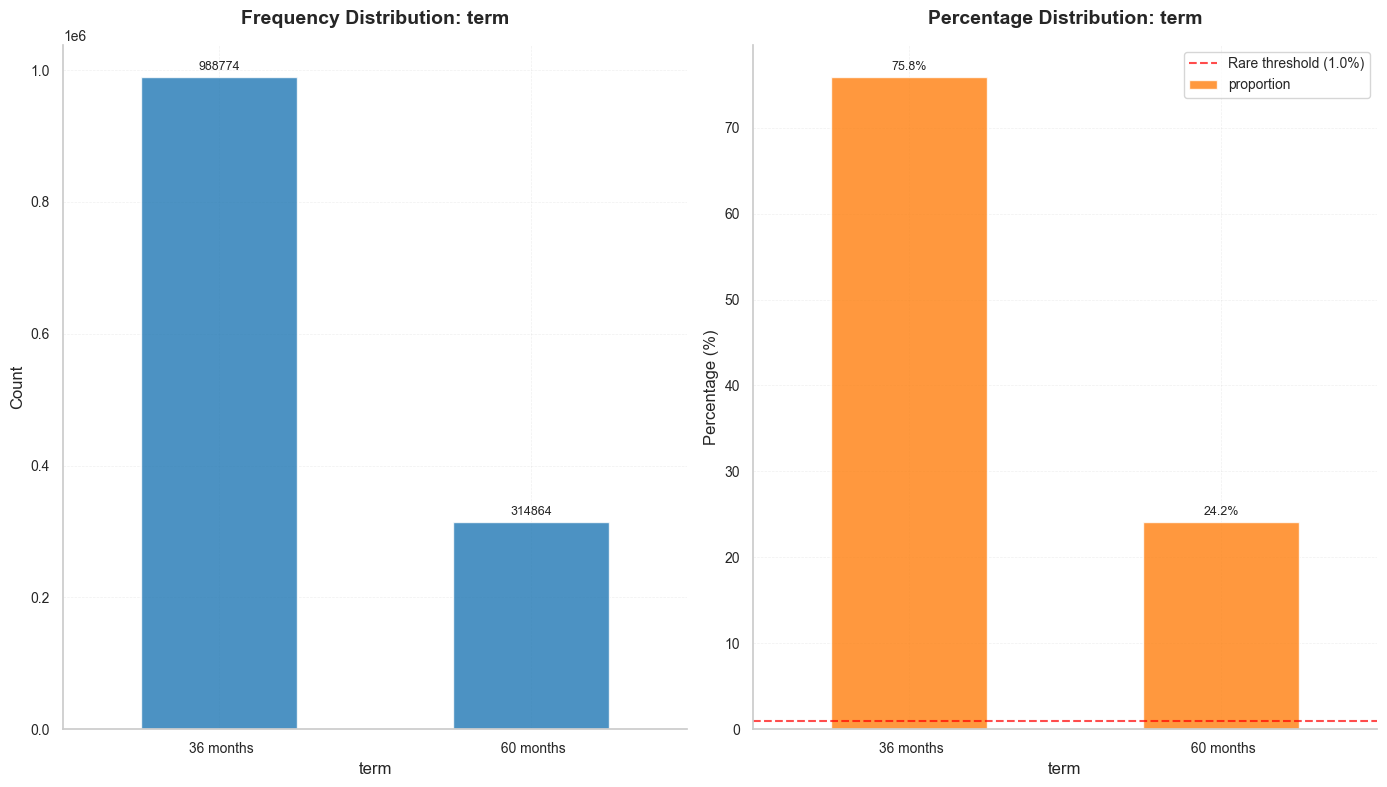

In [8]:
freq_results = analyze_frequency_distribution(df, 'term', plot=True)

2026-01-06 21:38:22.764 | INFO     | utils.eda_helpers:calculate_default_rates:180 - 
2026-01-06 21:38:22.765 | INFO     | utils.eda_helpers:calculate_default_rates:181 - DEFAULT RATE ANALYSIS: term
2026-01-06 21:38:22.766 | INFO     | utils.eda_helpers:calculate_default_rates:182 - ============================================================



Calculating default rates...
Analyzing column: term
Target column: target
Working with 1,303,638 valid rows

Default Rate by Category:
      term  total_loans  defaults  default_rate_%
 60 months       314864    102517           32.56
 36 months       988774    159169           16.10

────────────────────────────────────────────────────────────
Key Statistics:
  Overall default rate:     20.07%
  Minimum default rate:     16.10%
  Maximum default rate:     32.56%
  Range:                    16.46 percentage points
  Risk ratio (max/min):     2.02x

⚠️  High-risk categories (>30% default):
    -  60 months: 32.56% (314,864 loans)

────────────────────────────────────────────────────────────
✅ STRONG SIGNAL: Large variation in default rates (>10 points)
   This feature has good predictive power for modeling

Generating plots...


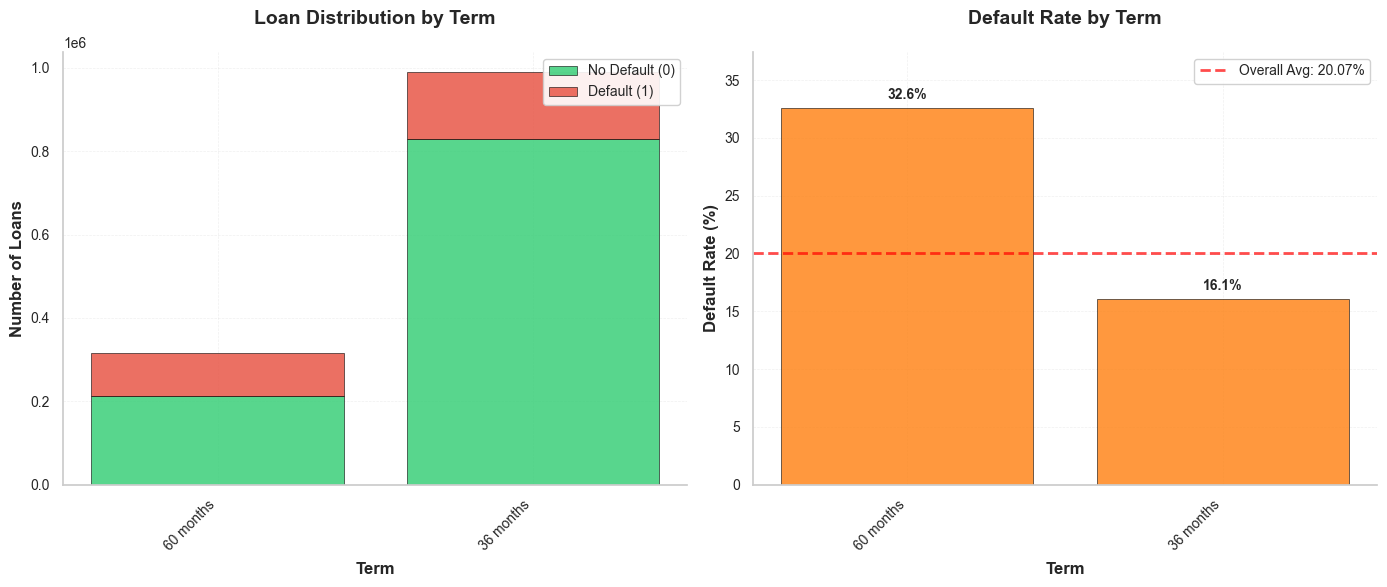

✅ Plots generated successfully


In [9]:
default_results = calculate_default_rates(df, 'term', plot=True)


In [12]:
# Step 3: Chi-square test
chi2_results = perform_chi_square_test(df, 'term')



2026-01-06 21:41:28.329 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-06 21:41:28.330 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: term
2026-01-06 21:41:28.331 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 40,334.62
  P-value:             0.0000e+00
  Degrees of freedom:  1
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (0.0000e+00) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → term IS significantly associated with default


In [13]:
crammers_v = calculate_cramers_v(df, 'term', 'target')

2026-01-06 21:41:31.685 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-06 21:41:31.686 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): term
2026-01-06 21:41:31.687 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.1759

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
✅ Cramér's V = 0.1759 → MODERATE

Variance Explained: 3.09%


In [11]:
interpret_results(
    chi2_results=chi2_results,
    cramers_results=crammers_v,
    freq_results=freq_results,
    default_results=default_results,
    column='term'
)


╔════════════════════════════════════════════════════════════════════╗
║                     FINAL RECOMMENDATION: term                     ║
╚════════════════════════════════════════════════════════════════════╝

Decision: ✅✅ KEEP FEATURE (Strong Predictor)

Rationale:
  ✅ Statistically significant (p < 0.05)
  ✅✅ Strong effect size (V = 0.1759)
  ✅ Explains 3.1% of default variation
  ✅ Large default rate range (16.5 points)

Recommended Encoding: One-Hot Encoding

Implementation:
  df['term'] = df['term'].str.strip()
  dummies = pd.get_dummies(df['term'], prefix='term', drop_first=True)

══════════════════════════════════════════════════════════════════════



In [14]:
check_missing_values = check_missing_values(df, 'term')

2026-01-07 18:02:18.260 | INFO     | utils.eda_helpers:check_missing_values:748 - 
2026-01-07 18:02:18.263 | INFO     | utils.eda_helpers:check_missing_values:749 - MISSING VALUES CHECK: term
2026-01-07 18:02:18.263 | INFO     | utils.eda_helpers:check_missing_values:750 - ============================================================



Missing Value Summary:
  Total rows:           1,303,638
  Non-missing values:   1,303,638 (100.00%)
  Missing values:       0 (0.00%)

────────────────────────────────────────────────────────────
✅ No missing values detected
   This feature is complete - no imputation needed

   All 1,303,638 rows have valid values


In [16]:
categorical_columns

Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'earliest_cr_line',
       'application_type', 'verification_status_joint',
       'sec_app_earliest_cr_line'],
      dtype='object')

### Emp Title

In [18]:
# delete the column with too many unique values. 
df.emp_title.value_counts()

emp_title
Teacher                             20499
Manager                             18706
Owner                                9805
Registered Nurse                     8477
RN                                   8253
                                    ...  
Branch Retail Executive, Manager        1
tile cutting                            1
Global Payroll                          1
Snack Bar Attendant                     1
Acft mechanic                           1
Name: count, Length: 371436, dtype: int64

### Emp Length

2026-01-07 18:27:01.382 | INFO     | utils.eda_helpers:analyze_frequency_distribution:59 - 
2026-01-07 18:27:01.383 | INFO     | utils.eda_helpers:analyze_frequency_distribution:60 - FREQUENCY DISTRIBUTION: emp_length
2026-01-07 18:27:01.384 | INFO     | utils.eda_helpers:analyze_frequency_distribution:61 - ============================================================



Absolute Counts:
emp_length
10+ years    428553
2 years      117825
< 1 year     104552
3 years      104204
1 year        85678
5 years       81623
4 years       78033
6 years       60934
8 years       59127
7 years       58148
9 years       49504
Name: count, dtype: int64

Percentage Distribution:
emp_length
10+ years    34.89
2 years       9.59
< 1 year      8.51
3 years       8.48
1 year        6.98
5 years       6.65
4 years       6.35
6 years       4.96
8 years       4.81
7 years       4.73
9 years       4.03
Name: proportion, dtype: float64

────────────────────────────────────────────────────────────
Summary:
  Total categories: 11
  Total observations: 1,303,638

✅ No rare categories detected (all >1.0%)


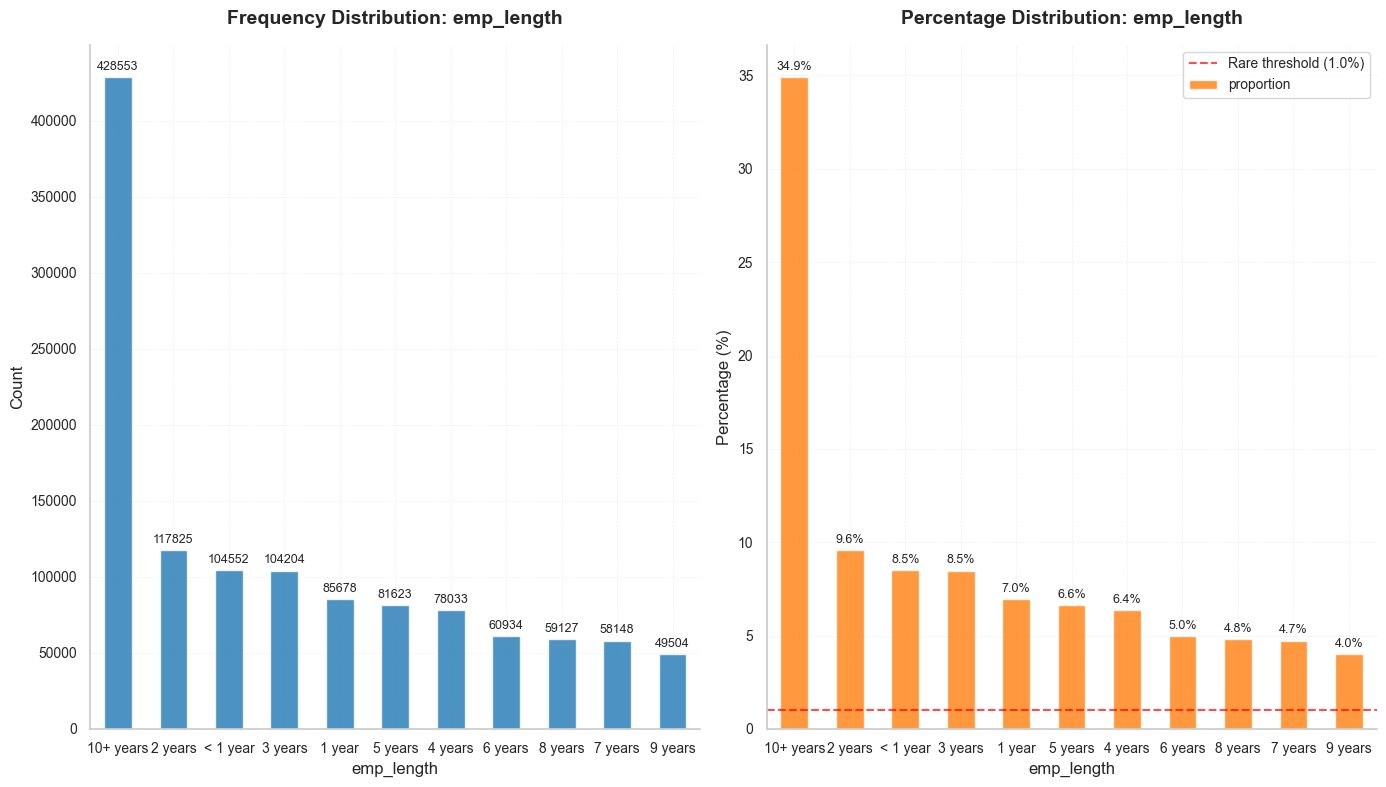

In [27]:
freq_results = analyze_frequency_distribution(df, 'emp_length', plot=True)


In [34]:
df.emp_length.value_counts()

emp_length
10+ years    428553
2 years      117825
< 1 year     104552
3 years      104204
1 year        85678
5 years       81623
4 years       78033
6 years       60934
8 years       59127
7 years       58148
9 years       49504
Name: count, dtype: int64

In [38]:
stats = df.groupby('emp_length')['target'].agg(['count', 'mean']).reset_index()
stats = stats.sort_values(by='mean', ascending=False)
stats

,emp_length,count,mean
10,< 1 year,104552,0.206806
0,1 year,85678,0.206494
3,3 years,104204,0.200923
8,8 years,59127,0.200653
9,9 years,49504,0.200226
2,2 years,117825,0.199296
4,4 years,78033,0.198967
5,5 years,81623,0.196967
7,7 years,58148,0.195793
6,6 years,60934,0.194620


Key Insight:
✅ Inverse relationship - longer employment = lower default risk
​
⚠️ BUT weak signal - only 1.79 point spread (20.68% → 18.89%)

Will make bins (0-2) --> Unstable, (5-10) --> stable and so on! 


In [40]:
chi = perform_chi_square_test(df, 'emp_length')
chi 

2026-01-07 18:37:21.041 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-07 18:37:21.042 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: emp_length
2026-01-07 18:37:21.043 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 317.57
  P-value:             2.9818e-62
  Degrees of freedom:  10
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (2.9818e-62) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → emp_length IS significantly associated with default


{'chi2_statistic': 317.57053682111246,
 'p_value': 2.9817603348011066e-62,
 'dof': 10,
 'is_significant': True,
 'significance_level': 'Extremely Strong'}

In [41]:
cram = calculate_cramers_v(df, 'emp_length', 'target')

2026-01-07 18:37:44.206 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-07 18:37:44.207 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): emp_length
2026-01-07 18:37:44.207 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.0161

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
❌ Cramér's V = 0.0161 → NEGLIGIBLE

Variance Explained: 0.03%


In [48]:
# Total 75,457 missing values in emp_length
# For missing values, we will consider them as 0 years of experience or employment length.'
#
print(df['emp_length'].isnull().sum() )
print(df['emp_length'].isnull().sum() / len(df) * 100 )

75457
5.788186597813197


### Home Ownership

2026-01-07 18:46:58.486 | INFO     | utils.eda_helpers:analyze_frequency_distribution:59 - 
2026-01-07 18:46:58.487 | INFO     | utils.eda_helpers:analyze_frequency_distribution:60 - FREQUENCY DISTRIBUTION: home_ownership
2026-01-07 18:46:58.487 | INFO     | utils.eda_helpers:analyze_frequency_distribution:61 - ============================================================



Absolute Counts:
home_ownership
MORTGAGE    645509
RENT        517821
OWN         139849
ANY            267
OTHER          144
NONE            48
Name: count, dtype: int64

Percentage Distribution:
home_ownership
MORTGAGE    49.52
RENT        39.72
OWN         10.73
ANY          0.02
OTHER        0.01
NONE         0.00
Name: proportion, dtype: float64

────────────────────────────────────────────────────────────
Summary:
  Total categories: 6
  Total observations: 1,303,638

⚠️  Rare categories (<1.0%):
    - ANY: 267 (0.02%)
    - OTHER: 144 (0.01%)
    - NONE: 48 (0.00%)


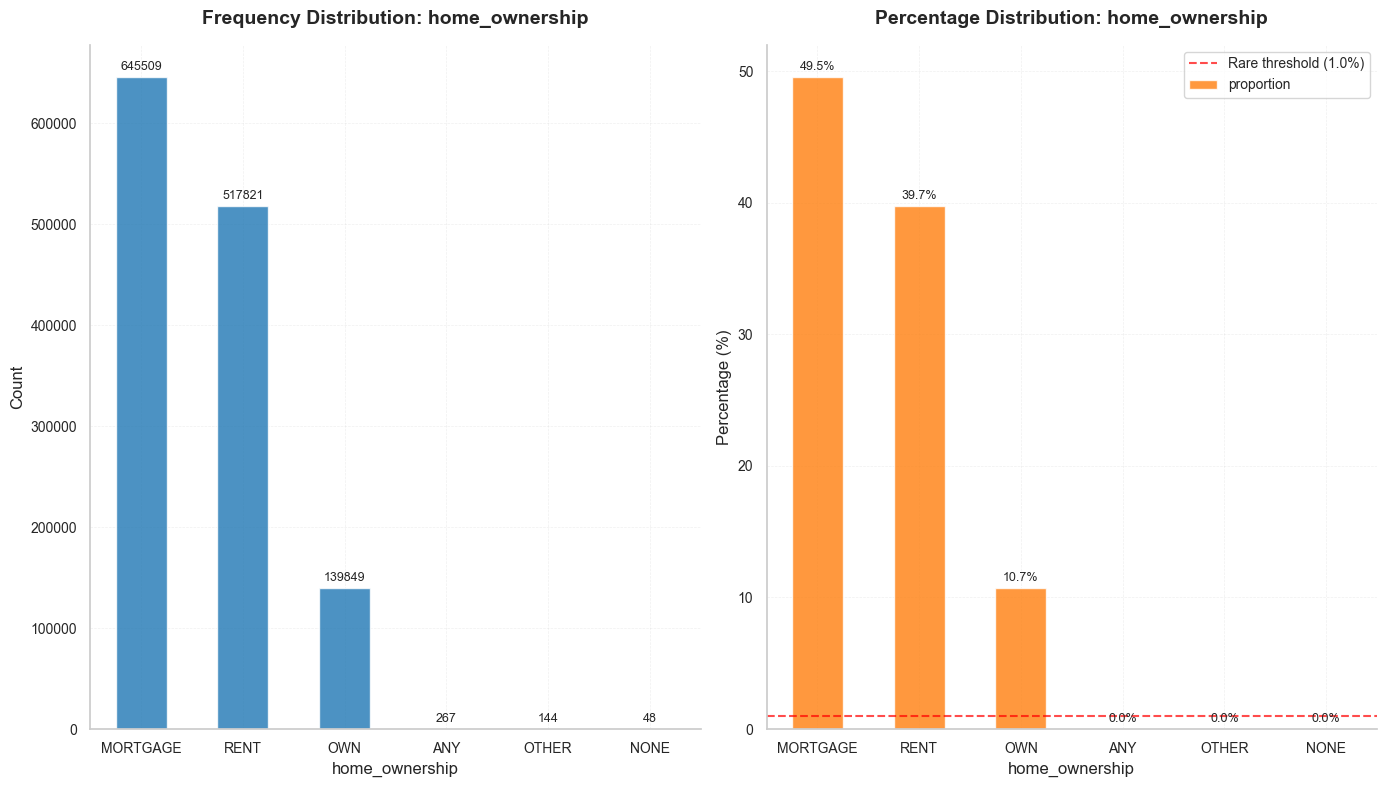

In [43]:
analyze_frequency_distribution = analyze_frequency_distribution(df, 'home_ownership', plot=True)

2026-01-07 19:07:01.626 | INFO     | utils.eda_helpers:calculate_default_rates:180 - 
2026-01-07 19:07:01.626 | INFO     | utils.eda_helpers:calculate_default_rates:181 - DEFAULT RATE ANALYSIS: home_ownership
2026-01-07 19:07:01.627 | INFO     | utils.eda_helpers:calculate_default_rates:182 - ============================================================



Calculating default rates...
Analyzing column: home_ownership
Target column: target
Working with 1,303,638 valid rows

Default Rate by Category:
home_ownership  total_loans  defaults  default_rate_%
          RENT       517821    120909           23.35
           OWN       139849     29016           20.75
           ANY          267        52           19.48
         OTHER          144        27           18.75
      MORTGAGE       645509    111675           17.30
          NONE           48         7           14.58

────────────────────────────────────────────────────────────
Key Statistics:
  Overall default rate:     20.07%
  Minimum default rate:     14.58%
  Maximum default rate:     23.35%
  Range:                    8.77 percentage points
  Risk ratio (max/min):     1.60x

✅ Low-risk categories (<15% default):
    - NONE: 14.58% (48 loans)

────────────────────────────────────────────────────────────
✅ MODERATE SIGNAL: Moderate variation in default rates (5-10 points)
   This 

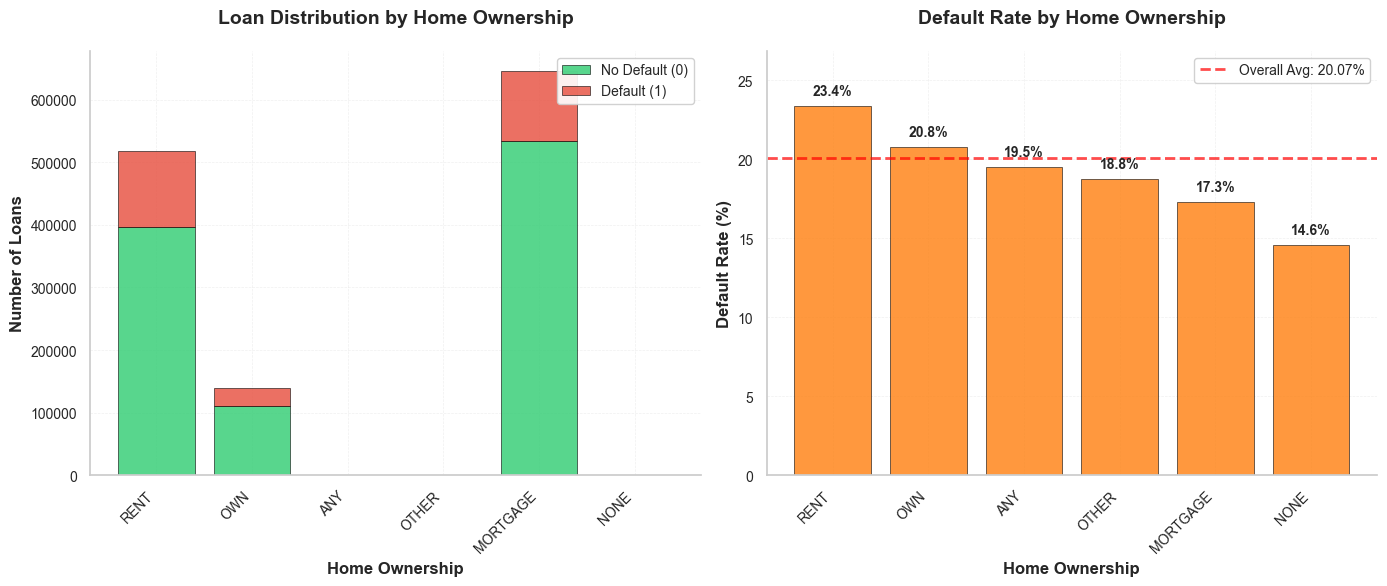

✅ Plots generated successfully


In [50]:
default_results = calculate_default_rates(df, 'home_ownership', plot=True)

In [51]:
chi = perform_chi_square_test(df, 'home_ownership')

2026-01-07 19:08:07.667 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-07 19:08:07.667 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: home_ownership
2026-01-07 19:08:07.668 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 6,598.96
  P-value:             0.0000e+00
  Degrees of freedom:  5
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (0.0000e+00) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → home_ownership IS significantly associated with default


In [111]:
cramers_v = calculate_cramers_v(df, 'home_ownership', 'target')

2026-01-09 00:00:59.104 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-09 00:00:59.106 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): home_ownership
2026-01-09 00:00:59.106 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.0711

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
⚠️ Cramér's V = 0.0711 → WEAK

Variance Explained: 0.51%


In [53]:
print(df['home_ownership'].isnull().sum() )
print(df['home_ownership'].isnull().sum() / len(df) * 100 )

0
0.0


### Verification Status

In [61]:
print(df['verification_status'].value_counts())
print('*' * 20)
print(df['verification_status'].value_counts(normalize=True))

verification_status
Source Verified    503737
Verified           407689
Not Verified       392212
Name: count, dtype: int64
********************
verification_status
Source Verified    0.386409
Verified           0.312732
Not Verified       0.300860
Name: proportion, dtype: float64


2026-01-07 19:16:24.225 | INFO     | utils.eda_helpers:calculate_default_rates:180 - 
2026-01-07 19:16:24.226 | INFO     | utils.eda_helpers:calculate_default_rates:181 - DEFAULT RATE ANALYSIS: verification_status
2026-01-07 19:16:24.226 | INFO     | utils.eda_helpers:calculate_default_rates:182 - ============================================================



Calculating default rates...
Analyzing column: verification_status
Target column: target
Working with 1,303,638 valid rows

Default Rate by Category:
verification_status  total_loans  defaults  default_rate_%
           Verified       407689     97593           23.94
    Source Verified       503737    106388           21.12
       Not Verified       392212     57705           14.71

────────────────────────────────────────────────────────────
Key Statistics:
  Overall default rate:     20.07%
  Minimum default rate:     14.71%
  Maximum default rate:     23.94%
  Range:                    9.23 percentage points
  Risk ratio (max/min):     1.63x

✅ Low-risk categories (<15% default):
    - Not Verified: 14.71% (392,212 loans)

────────────────────────────────────────────────────────────
✅ MODERATE SIGNAL: Moderate variation in default rates (5-10 points)
   This feature has some predictive value

Generating plots...


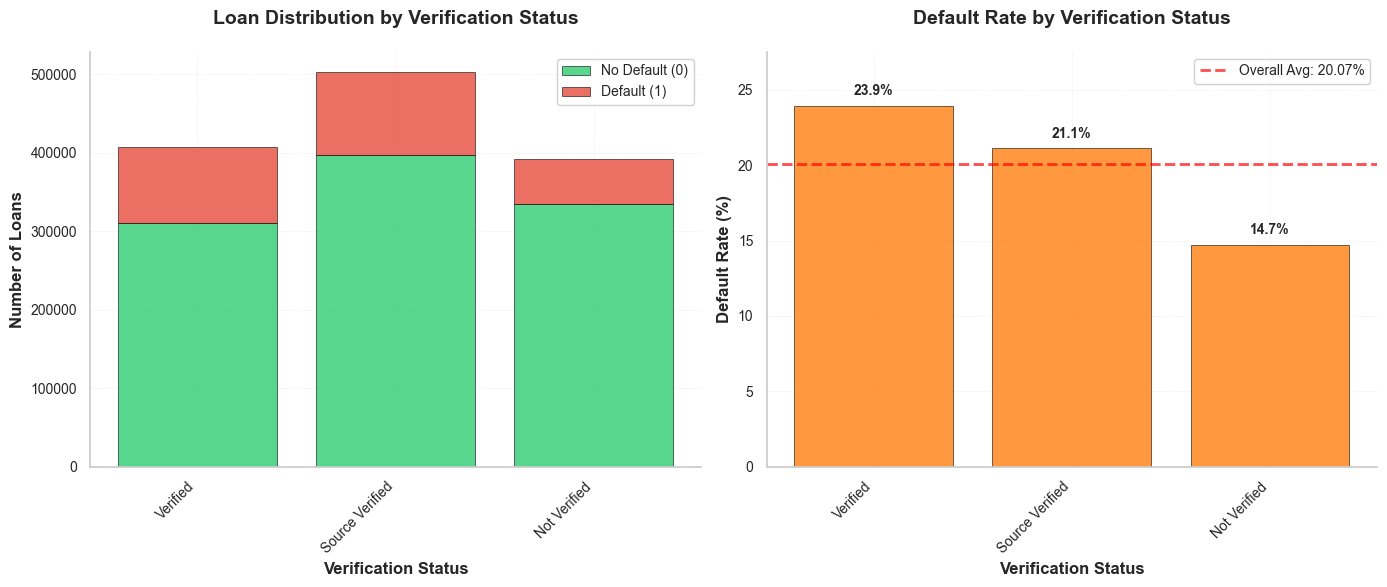

✅ Plots generated successfully


In [62]:
default_results = calculate_default_rates(df, 'verification_status', plot=True)

In [63]:
chi = perform_chi_square_test(df, 'verification_status')

2026-01-07 19:17:16.590 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-07 19:17:16.590 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: verification_status
2026-01-07 19:17:16.591 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 11,164.09
  P-value:             0.0000e+00
  Degrees of freedom:  2
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (0.0000e+00) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → verification_status IS significantly associated with default


In [64]:
cramers_v = calculate_cramers_v(df, 'verification_status', 'target')

2026-01-07 19:17:30.857 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-07 19:17:30.858 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): verification_status
2026-01-07 19:17:30.858 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.0925

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
⚠️ Cramér's V = 0.0925 → WEAK

Variance Explained: 0.86%


In [66]:
# check missing values in verification_status
print(df['verification_status'].isnull().sum() )
print(df['verification_status'].isnull().sum() / len(df) * 100 )

0
0.0


## Purpose

In [72]:
print(df['purpose'].value_counts())
print('*' * 20)
print(df['purpose'].value_counts(normalize=True))


purpose
debt_consolidation    757610
credit_card           285708
home_improvement       84497
other                  74937
major_purchase         28328
medical                15024
small_business         15010
car                    14121
moving                  9173
vacation                8732
house                   6967
wedding                 2294
renewable_energy         911
educational              326
Name: count, dtype: int64
********************
purpose
debt_consolidation    0.581151
credit_card           0.219162
home_improvement      0.064816
other                 0.057483
major_purchase        0.021730
medical               0.011525
small_business        0.011514
car                   0.010832
moving                0.007036
vacation              0.006698
house                 0.005344
wedding               0.001760
renewable_energy      0.000699
educational           0.000250
Name: proportion, dtype: float64


2026-01-07 19:32:28.673 | INFO     | utils.eda_helpers:calculate_default_rates:180 - 
2026-01-07 19:32:28.674 | INFO     | utils.eda_helpers:calculate_default_rates:181 - DEFAULT RATE ANALYSIS: purpose
2026-01-07 19:32:28.675 | INFO     | utils.eda_helpers:calculate_default_rates:182 - ============================================================



Calculating default rates...
Analyzing column: purpose
Target column: target
Working with 1,303,638 valid rows

Default Rate by Category:
           purpose  total_loans  defaults  default_rate_%
    small_business        15010      4465           29.75
  renewable_energy          911       216           23.71
            moving         9173      2151           23.45
           medical        15024      3292           21.91
             house         6967      1513           21.72
debt_consolidation       757610    161058           21.26
             other        74937     15867           21.17
          vacation         8732      1680           19.24
    major_purchase        28328      5304           18.72
  home_improvement        84497     15087           17.86
       educational          326        56           17.18
       credit_card       285708     48650           17.03
               car        14121      2068           14.64
           wedding         2294       279        

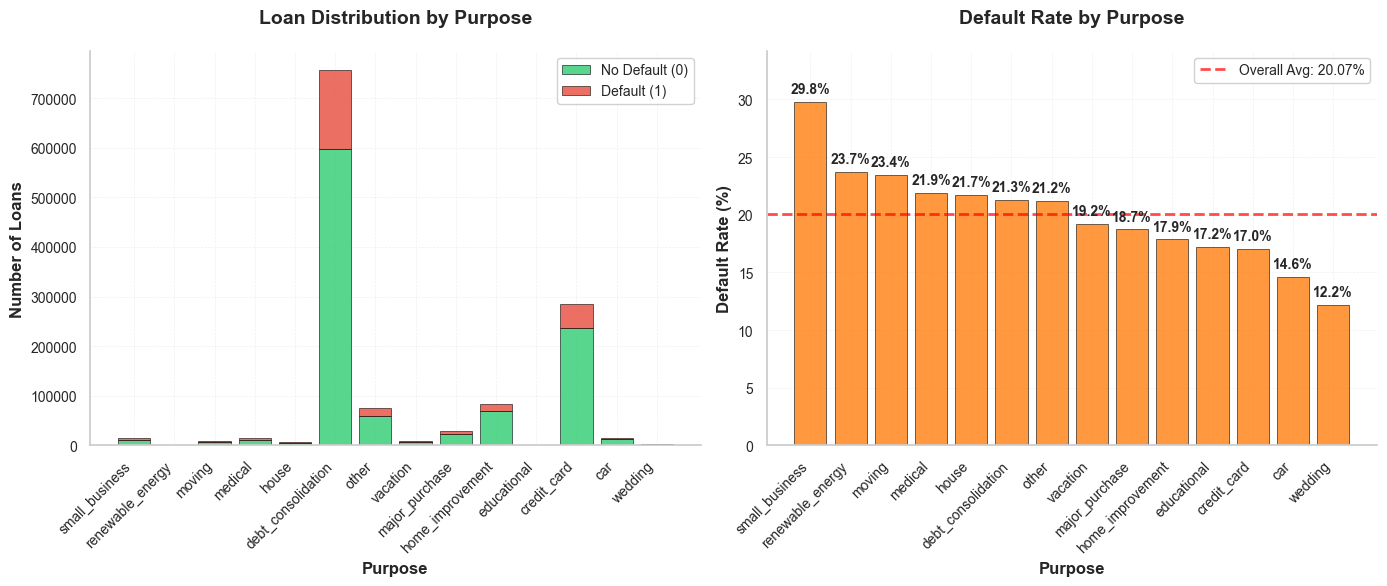

✅ Plots generated successfully


In [73]:
default_results = calculate_default_rates(df, 'purpose', plot=True)

In [74]:
chi = perform_chi_square_test(df, 'purpose')

2026-01-07 19:33:34.336 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-07 19:33:34.337 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: purpose
2026-01-07 19:33:34.337 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 4,008.84
  P-value:             0.0000e+00
  Degrees of freedom:  13
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (0.0000e+00) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → purpose IS significantly associated with default


In [75]:
cramers_v = calculate_cramers_v(df, 'purpose', 'target')

2026-01-07 19:33:45.389 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-07 19:33:45.390 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): purpose
2026-01-07 19:33:45.390 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.0555

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
⚠️ Cramér's V = 0.0555 → WEAK

Variance Explained: 0.31%


In [80]:
# check missing values in purpose
print(df['purpose'].isnull().sum() )
print(df['purpose'].isnull().sum() / len(df) * 100 )

0
0.0


### addr_state

In [82]:
print(df['addr_state'].value_counts())
print('*' * 20)
print(df['addr_state'].value_counts(normalize=True))

addr_state
CA    191036
TX    106677
NY    106387
FL     92620
IL     50030
NJ     46885
PA     44117
OH     42438
GA     42032
VA     36852
NC     36615
MI     34128
AZ     31716
MD     30224
MA     30007
CO     28859
WA     28362
MN     23242
IN     21020
MO     20563
TN     19667
NV     19652
CT     19063
WI     17138
AL     16130
OR     15965
SC     15477
LA     15021
KY     12439
OK     11846
KS     10892
UT      9785
AR      9708
NM      7158
HI      6568
MS      6316
NH      6243
RI      5692
WV      4745
MT      3699
DE      3666
NE      3422
DC      3370
AK      3097
WY      2835
SD      2679
VT      2559
ME      1921
ID      1557
ND      1511
IA         7
Name: count, dtype: int64
********************
addr_state
CA    0.146541
TX    0.081830
NY    0.081608
FL    0.071047
IL    0.038377
NJ    0.035965
PA    0.033841
OH    0.032554
GA    0.032242
VA    0.028269
NC    0.028087
MI    0.026179
AZ    0.024329
MD    0.023184
MA    0.023018
CO    0.022137
WA    0.021756
MN    0.01782

In [83]:
print(len(df['addr_state'].value_counts()))

51


2026-01-07 19:45:48.370 | INFO     | utils.eda_helpers:calculate_default_rates:180 - 
2026-01-07 19:45:48.372 | INFO     | utils.eda_helpers:calculate_default_rates:181 - DEFAULT RATE ANALYSIS: addr_state
2026-01-07 19:45:48.372 | INFO     | utils.eda_helpers:calculate_default_rates:182 - ============================================================



Calculating default rates...
Analyzing column: addr_state
Target column: target
Working with 1,303,638 valid rows

Default Rate by Category:
addr_state  total_loans  defaults  default_rate_%
        MS         6316      1655           26.20
        NE         3422       870           25.42
        AR         9708      2346           24.17
        AL        16130      3829           23.74
        OK        11846      2809           23.71
        LA        15021      3516           23.41
        NY       106387     23562           22.15
        NV        19652      4334           22.05
        IN        21020      4543           21.61
        TN        19667      4248           21.60
        FL        92620     19971           21.56
        NM         7158      1542           21.54
        MO        20563      4404           21.42
        SD         2679       572           21.35
        MD        30224      6452           21.35
        NJ        46885      9974           21.27
        

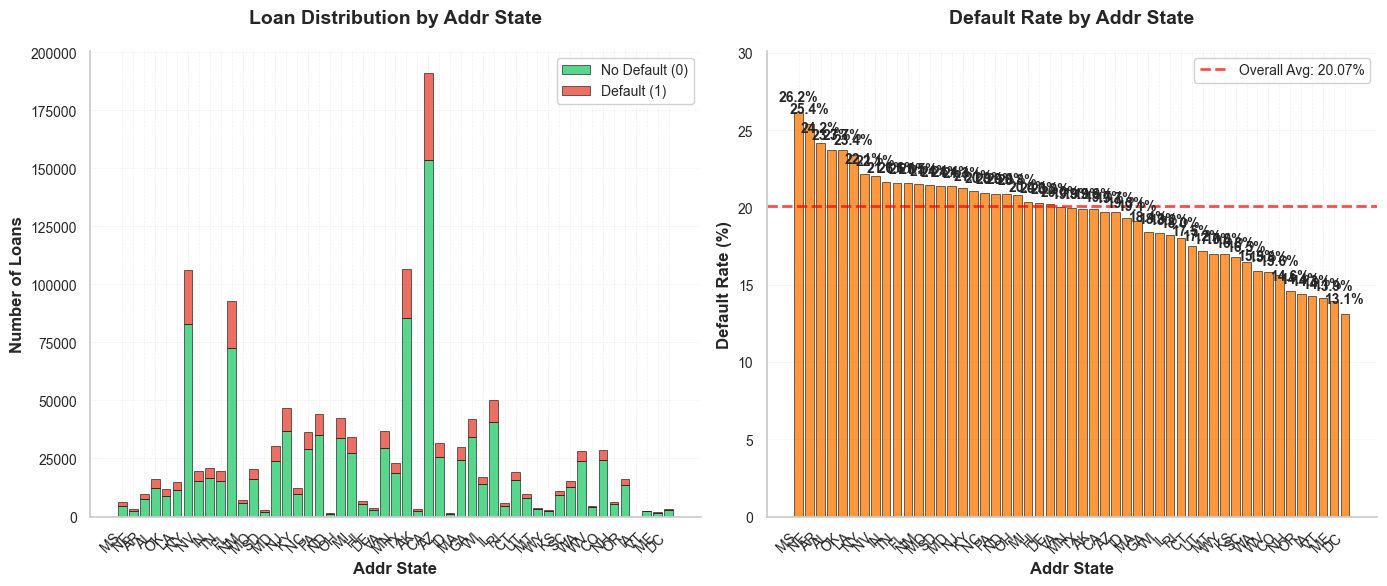

✅ Plots generated successfully


In [84]:
default_results = calculate_default_rates(df, 'addr_state', plot=True)

In [85]:
chi2_results = perform_chi_square_test(df, 'addr_state')

2026-01-07 19:46:18.881 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-07 19:46:18.881 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: addr_state
2026-01-07 19:46:18.882 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 3,331.39
  P-value:             0.0000e+00
  Degrees of freedom:  50
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (0.0000e+00) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → addr_state IS significantly associated with default


In [86]:
cramers_v = calculate_cramers_v(df, 'addr_state', 'target')

2026-01-07 19:46:28.630 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-07 19:46:28.630 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): addr_state
2026-01-07 19:46:28.631 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.0506

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
⚠️ Cramér's V = 0.0506 → WEAK

Variance Explained: 0.26%


In [87]:
# check missing values in addr_state
print(df['addr_state'].isnull().sum() )
print(df['addr_state'].isnull().sum() / len(df) * 100 )

0
0.0


### earliest_cr_line

In [96]:
print(len(df['earliest_cr_line'].value_counts()))

738


In [93]:
print(df['earliest_cr_line'].value_counts())
print('*' * 20)
print(df['earliest_cr_line'].value_counts(normalize=True))


earliest_cr_line
Aug-2001    9153
Aug-2002    8832
Sep-2003    8716
Oct-2001    8648
Aug-2000    8624
            ... 
Sep-1953       1
Mar-1957       1
Jul-1952       1
Jun-1955       1
Dec-1950       1
Name: count, Length: 738, dtype: int64
********************
earliest_cr_line
Aug-2001    7.021121e-03
Aug-2002    6.774887e-03
Sep-2003    6.685905e-03
Oct-2001    6.633743e-03
Aug-2000    6.615333e-03
                ...     
Sep-1953    7.670841e-07
Mar-1957    7.670841e-07
Jul-1952    7.670841e-07
Jun-1955    7.670841e-07
Dec-1950    7.670841e-07
Name: proportion, Length: 738, dtype: float64


2026-01-07 19:55:47.877 | INFO     | utils.eda_helpers:calculate_default_rates:180 - 
2026-01-07 19:55:47.878 | INFO     | utils.eda_helpers:calculate_default_rates:181 - DEFAULT RATE ANALYSIS: earliest_cr_line
2026-01-07 19:55:47.879 | INFO     | utils.eda_helpers:calculate_default_rates:182 - ============================================================



Calculating default rates...
Analyzing column: earliest_cr_line
Target column: target
Working with 1,303,638 valid rows

Default Rate by Category:
earliest_cr_line  total_loans  defaults  default_rate_%
        Aug-1951            1         1          100.00
        Sep-1957            1         1          100.00
        Nov-1957            1         1          100.00
        Jul-1952            1         1          100.00
        Nov-1956            3         2           66.67
        Feb-1961            5         3           60.00
        Nov-1959            5         3           60.00
        Jun-1959            5         3           60.00
        Mar-1960            5         3           60.00
        Jul-1962            7         4           57.14
        Nov-1963            9         5           55.56
        Dec-1962           15         8           53.33
        Jun-1964           17         9           52.94
        Jul-1951            2         1           50.00
        Jun-

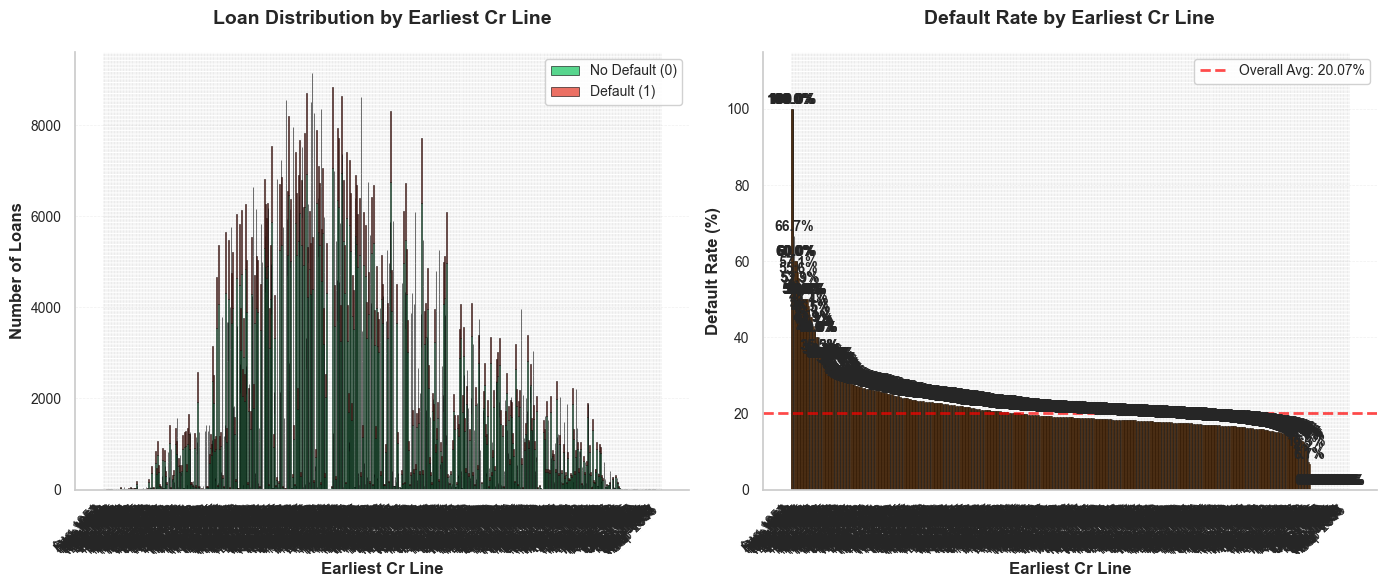

✅ Plots generated successfully


In [95]:
default_results = calculate_default_rates(df, 'earliest_cr_line', plot=True)

In [97]:
chi2_results = perform_chi_square_test(df, 'earliest_cr_line')

2026-01-07 20:04:41.494 | INFO     | utils.eda_helpers:perform_chi_square_test:419 - 
2026-01-07 20:04:41.495 | INFO     | utils.eda_helpers:perform_chi_square_test:420 - CHI-SQUARE TEST: earliest_cr_line
2026-01-07 20:04:41.495 | INFO     | utils.eda_helpers:perform_chi_square_test:421 - ============================================================



Chi-Square Test Results:
  Chi-square statistic: 4,813.63
  P-value:             0.0000e+00
  Degrees of freedom:  737
  Significance level:  α = 0.05

────────────────────────────────────────────────────────────
INTERPRETATION:
────────────────────────────────────────────────────────────
✅✅✅ RESULT: p-value (0.0000e+00) < α (0.05)
   Evidence strength: Extremely Strong
   Decision: REJECT H₀
   → earliest_cr_line IS significantly associated with default


In [98]:
cramers_v = calculate_cramers_v(df, 'earliest_cr_line', 'target')

2026-01-07 20:04:55.087 | INFO     | utils.eda_helpers:calculate_cramers_v:513 - 
2026-01-07 20:04:55.088 | INFO     | utils.eda_helpers:calculate_cramers_v:514 - CRAMÉR'S V (EFFECT SIZE): earliest_cr_line
2026-01-07 20:04:55.088 | INFO     | utils.eda_helpers:calculate_cramers_v:515 - ============================================================



Cramér's V: 0.0608

────────────────────────────────────────────────────────────
Interpretation Scale:
  0.00 - 0.05: Negligible
  0.05 - 0.10: Weak
  0.10 - 0.20: Moderate
  0.20 - 0.40: Strong
  0.40+:       Very Strong

────────────────────────────────────────────────────────────
⚠️ Cramér's V = 0.0608 → WEAK

Variance Explained: 0.37%


In [103]:
# check missing values in purpose
print(df['earliest_cr_line'].isnull().sum() )
print(df['earliest_cr_line'].isnull().sum() / len(df) * 100 )

0
0.0


## application_type

In [102]:
df.application_type.value_counts(normalize=True)  * 100

application_type
Individual    98.21699
Joint App      1.78301
Name: proportion, dtype: float64

In [104]:
# check missing values in purpose
print(df['application_type'].isnull().sum() )
print(df['application_type'].isnull().sum() / len(df) * 100 )

0
0.0


## verification_status_joint

In [106]:
df.verification_status_joint.value_counts()

verification_status_joint
Not Verified       13540
Source Verified     5533
Verified            4025
Name: count, dtype: int64

## sec_app_earliest_cr_line

In [108]:
df.sec_app_earliest_cr_line.value_counts()

sec_app_earliest_cr_line
Aug-2006    176
Aug-2005    158
Sep-2006    143
Sep-2004    142
Jul-2006    141
           ... 
Mar-1965      1
Jun-1980      1
Dec-1965      1
Feb-1981      1
Jun-1979      1
Name: count, Length: 560, dtype: int64

In [109]:
# check missing values in purpose
print(df['sec_app_earliest_cr_line'].isnull().sum() )
print(df['sec_app_earliest_cr_line'].isnull().sum() / len(df) * 100 )

1287121
98.73300716916813


In [110]:
categorical_columns

Index(['term', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state', 'earliest_cr_line',
       'application_type', 'verification_status_joint',
       'sec_app_earliest_cr_line'],
      dtype='object')